In [1]:
import sklearn as sk
from sklearn import preprocessing
from sklearn import decomposition
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load data

In [8]:
# load the dataset
dfs = [pd.read_csv('../HackathonData/T2D/SpeciesT2D_train.csv'),
       pd.read_csv('../HackathonData/IBD/SpeciesIBD_train.csv'),
       pd.read_csv('../HackathonData/CAD/SpeciesCAD_train.csv'),
       pd.read_csv('../HackathonData/CKD/SpeciesCKD_train.csv')]
df = pd.concat([x if x['label'].replace(1, idx + 1, inplace=True) == True else x for idx, x in enumerate(dfs)], join="outer", axis=0).fillna(0).drop_duplicates()
df
df["label"].value_counts()

0    622
1    516
2     82
3     41
4     28
Name: label, dtype: int64

### Data preparation

In [9]:
df = pd.read_csv('../Hackathon_Microbiome_Train_Combined/Train_Combined/train_combined_Species.csv')
#df = df.loc[:, (df != 0).any(axis=0)]
#df['sample_ID', 'label']
df = df.fillna(0).drop_duplicates()
df
#df["label"].value_counts()

,Unnamed: 0,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;UCG-005;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Blautia;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Peptococcales;Peptococcaceae;uncultured;uncultured organism,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;uncultured;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;Colidextribacter;uncultured Flavonifractor sp.,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;UCG-002;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;uncultured;uncultured bacterium.1,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;uncultured;uncultured organism,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Frisingicoccus;uncultured bacterium,...,Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Rikenellaceae;Rikenellaceae RC9 gut group;uncultured bacterium.93,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Catenibacillus;uncultured bacterium.6,Bacteria;Firmicutes;Negativicutes;Veillonellales-Selenomonadales;Sporomusaceae;Anaerosinus;Clostridiales bacterium Marseille-P2411,Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Rikenellaceae;Rikenellaceae RC9 gut group;uncultured bacterium.102,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;uncultured;uncultured bacterium.252,Bacteria;Firmicutes;Clostridia;Oscillospirales;Ruminococcaceae;Fournierella;uncultured bacterium.20,Bacteria;Firmicutes;Clostridia;Peptostreptococcales-Tissierellales;Anaerovoracaceae;[Eubacterium] nodatum group;uncultured bacterium.13,Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes;uncultured bacterium.202,Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Rikenellaceae;Rikenellaceae RC9 gut group;uncultured bacterium.115,label
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,2335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2336,2336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2337,2337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2338,2338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
df_without = df.drop(['label', 'sample_ID'], axis=1)
corr = df_without.corr()
corr

,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Blautia;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Peptococcales;Peptococcaceae;uncultured;uncultured organism,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Lachnospira;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;uncultured;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;Colidextribacter;uncultured Flavonifractor sp.,Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes;gut metagenome,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;UCG-002;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;uncultured;uncultured bacterium.1,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;Colidextribacter;uncultured organism,Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;uncultured bacterium,...,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;[Ruminococcus] torques group;uncultured bacterium.115,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;[Eubacterium] xylanophilum group;uncultured bacterium.25,Bacteria;Firmicutes;Clostridia;Oscillospirales;UCG-010;uncultured bacterium.208,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Psychrobacter;Psychrobacter sp. JCM 18903,Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes;gut metagenome.113,Bacteria;Firmicutes;Bacilli;Erysipelotrichales;Erysipelotrichaceae;Catenisphaera;uncultured rumen bacterium.2,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Cronobacter;Cronobacter muytjensii ATCC 51329.2,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;UCG-002;uncultured bacterium.260,Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Barnesiellaceae;Barnesiella;uncultured bacterium.129,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;UCG-005;uncultured bacterium.226
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Blautia;uncultured bacterium,1.000000,-0.001470,-0.001181,-0.001390,-0.003460,-0.001181,-0.001181,-0.005116,-0.001898,-0.001293,...,-0.001181,-0.001181,-0.001181,-0.001181,-0.001432,-0.001181,-0.001181,-0.001181,-0.001181,-0.001181
Bacteria;Firmicutes;Clostridia;Peptococcales;Peptococcaceae;uncultured;uncultured organism,-0.001470,1.000000,-0.000966,-0.001137,0.007017,-0.000966,-0.000966,-0.003249,-0.001553,-0.001058,...,-0.000966,-0.000966,-0.000966,-0.000966,-0.001172,-0.000966,-0.000966,-0.000966,-0.000966,-0.000966
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Lachnospira;uncultured bacterium,-0.001181,-0.000966,1.000000,-0.000914,-0.007858,1.000000,-0.000776,-0.003363,-0.001248,0.995036,...,-0.000776,-0.000776,-0.000776,-0.000776,-0.000942,-0.000776,-0.000776,-0.000776,-0.000776,-0.000776
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;uncultured;uncultured bacterium,-0.001390,-0.001137,-0.000914,1.000000,-0.009248,-0.000914,-0.000914,-0.003958,-0.001468,-0.001000,...,-0.000914,-0.000914,-0.000914,-0.000914,-0.001108,-0.000914,-0.000914,-0.000914,-0.000914,-0.000914
Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;Colidextribacter;uncultured Flavonifractor sp.,-0.003460,0.007017,-0.007858,-0.009248,1.000000,-0.007858,-0.007858,0.026547,0.014411,-0.008602,...,-0.007858,-0.007858,-0.007858,-0.007858,-0.009531,-0.007858,-0.007858,-0.007858,-0.007858,0.080480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bacteria;Firmicutes;Bacilli;Erysipelotrichales;Erysipelotrichaceae;Catenisphaera;uncultured rumen bacterium.2,-0.001181,-0.000966,-0.000776,-0.000914,-0.007858,-0.000776,-0.000776,-0.003363,-0.001248,-0.000850,...,-0.000776,-0.000776,-0.000776,-0.000776,-0.000942,1.000000,-0.000776,-0.000776,-0.000776,-0.000776
Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Cronobacter;Cr

### PCA

In [14]:
from sklearn import svm
from sklearn.model_selection import train_test_split
df = df.drop('sample_ID', axis=1)
X = df.drop(['label'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)

In [15]:
accuracy

0.42248062015503873

### Random Forest

In [41]:
df["label"].value_counts()

0    2126
1     516
2      82
3      41
4      28
Name: label, dtype: int64

In [35]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score, confusion_matrix
import imblearn
from sklearn import metrics
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier



df_without = df.drop(['sample_ID'], axis=1)
X = df_without.drop(["label"], axis=1)
y = df_without["label"]

#X = preprocessing.normalize(X)

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y_train))
# define oversampling strategy
# Over-sample the minority classes using RandomOverSampler
ros = RandomOverSampler(random_state=1234)
X_train, y_train = ros.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train))

#y_train.values.ravel()  # type: ignore
# creating a RF classifier
clf = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=1234)

#Training the model on the training dataset
# with fit-Function to train the model using the training sets as parameters
clf.fit(X_train, y_train)  # type: ignore
#performing predictions on the test dataset
y_pred = clf.predict(X_test)

feature_names = X.columns
importances = clf.feature_importances_
forest_importances = pd.Series(importances, index = feature_names)
t = forest_importances.sort_values(ascending=False)
print(t)

# metrics are used to find accuracy or error
print()
a = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of the model based on accuracy of test set: {a: .4f}")
print(f"Error of test set: {1 - a:.4f}")
b = clf.oob_score_
print(f"Out of bag score (samples in training set): {b:.4f}")
print(f"out-of-bag error (samples in training set): {1 - b:.4f}")
print(f"Accuracy of Training set: {clf.score(X_train, y_train) :.4f}")
print("Classification Report: \n {}\n".format(metrics.classification_report(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_pred)))
#print("ROC AUC: {0:.4f}\n".format(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])))
#RocCurveDisplay.from_estimator(clf, X_test, y_test, name="Random Forest", multi_class=[''])
#plt.show()
'''
roc = {label: [] for label in multi_class_series.unique()}
for label in multi_class_series.unique():
    selected_classifier.fit(train_set_dataframe, train_class == label)
    predictions_proba = selected_classifier.predict_proba(test_set_dataframe)
    roc[label] += roc_auc_score(test_class, predictions_proba[:,1])
'''

t

Counter({0: 500, 1: 409, 2: 64, 3: 35, 4: 23})
Counter({3: 500, 0: 500, 1: 500, 2: 500, 4: 500})
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Blautia;Ruminococcus sp. 5_1_39BFAA.3                  0.004103
Bacteria;Firmicutes;Clostridia;Oscillospirales;Ruminococcaceae;UBA1819;Eubacterium sp. UNK.MGS-25.3                  0.003577
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Blautia;Blautia sp. Marseille-P2398.4                  0.003526
Bacteria;Firmicutes;Clostridia;Oscillospirales;Ruminococcaceae;Faecalibacterium;uncultured bacterium.252             0.003409
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Anaerostipes;metagenome.4                              0.002934
                                                                                                                       ...   
Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;UCG-005;uncultured bacterium.131                     0.000000
Bacteria;Firmicutes;B

C:\Users\Flo13\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Flo13\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Flo13\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Blautia;Ruminococcus sp. 5_1_39BFAA.3                  0.004103
Bacteria;Firmicutes;Clostridia;Oscillospirales;Ruminococcaceae;UBA1819;Eubacterium sp. UNK.MGS-25.3                  0.003577
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Blautia;Blautia sp. Marseille-P2398.4                  0.003526
Bacteria;Firmicutes;Clostridia;Oscillospirales;Ruminococcaceae;Faecalibacterium;uncultured bacterium.252             0.003409
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Anaerostipes;metagenome.4                              0.002934
                                                                                                                       ...   
Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;UCG-005;uncultured bacterium.131                     0.000000
Bacteria;Firmicutes;Bacilli;Lactobacillales;Streptococcaceae;Streptococcus;uncultured Streptococcus sp..2            0

C:\Users\Flo13\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Flo13\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Flo13\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\Flo13\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Flo13\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 1136, in f1_sco

Mean f1: nan
Mean recall: nan
Mean precision: nan


C:\Users\Flo13\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


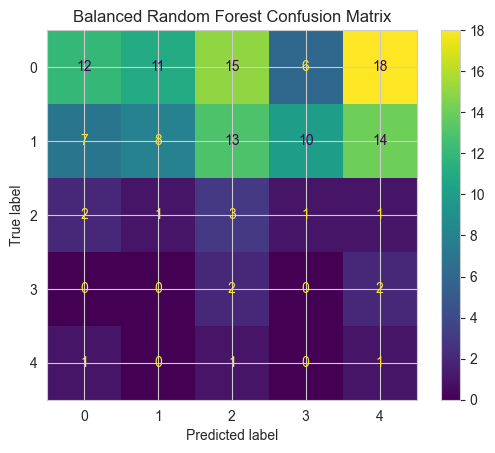

In [24]:
#Importing essential libraries
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier

df_without = df.drop(['sample_ID'], axis=1)
X = df_without.drop(["label"], axis=1)
y = df_without["label"]
#X = preprocessing.normalize(X)

#Build SRF model
BRFC = BalancedRandomForestClassifier(n_estimators=150, random_state=1234)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
scoring = ('f1', 'recall', 'precision')
#Evaluate BRFC model
scores = cross_validate(BRFC, X, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#Train BRFC
BRFC.fit(X_train, y_train.values.ravel())
#BRFC prediction result
y_pred = BRFC.predict(X_test)
#Create confusion matrix
fig = plot_confusion_matrix(BRFC, X_test, y_test)
plt.title('Balanced Random Forest Confusion Matrix')
plt.show()

In [ ]:
    # example of random oversampling to balance the class distribution
    from collections import Counter
    from imblearn.over_sampling import RandomOverSampler
    # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='minority')
    # fit and apply the transform
    X, y = oversample.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y))